In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
data = pd.read_csv('/content/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
label_encoder = LabelEncoder()
data['Department'] = label_encoder.fit_transform(data['Department'])
data['salary'] = label_encoder.fit_transform(data['salary'])

In [7]:
corr_matrix = data.corr()
print(corr_matrix['left'].sort_values(ascending=False))

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
Department               0.032105
number_project           0.023787
last_evaluation          0.006567
salary                  -0.001294
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


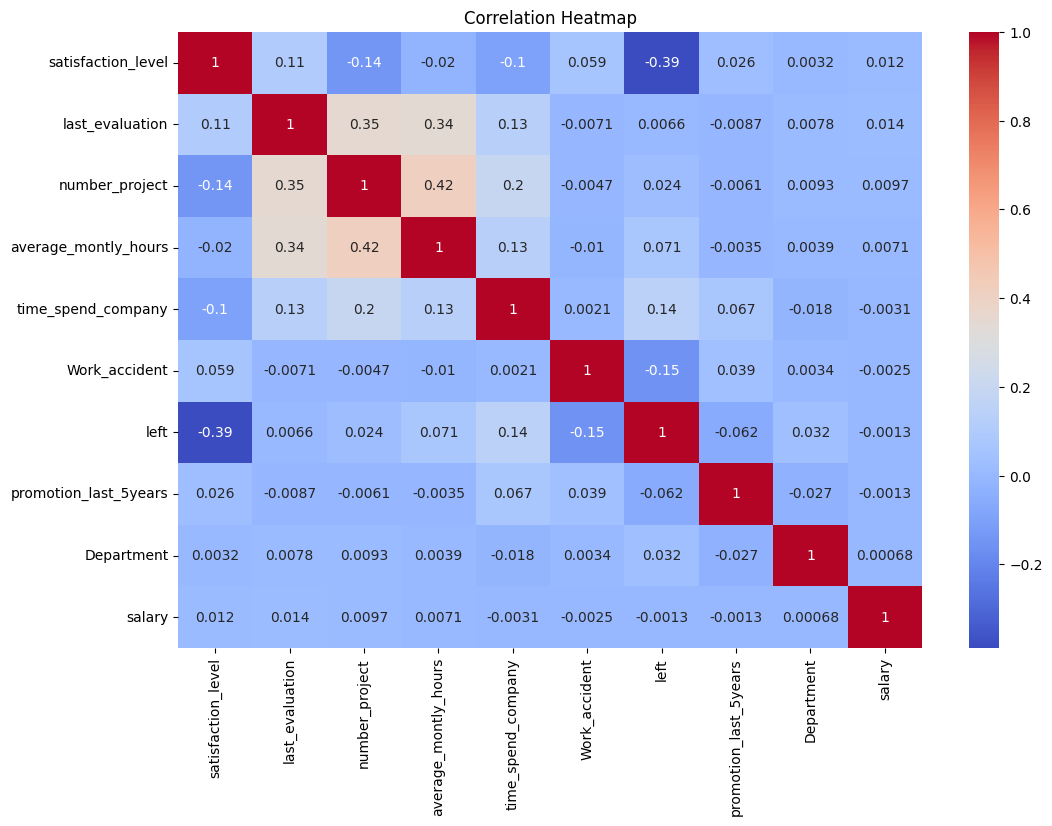

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

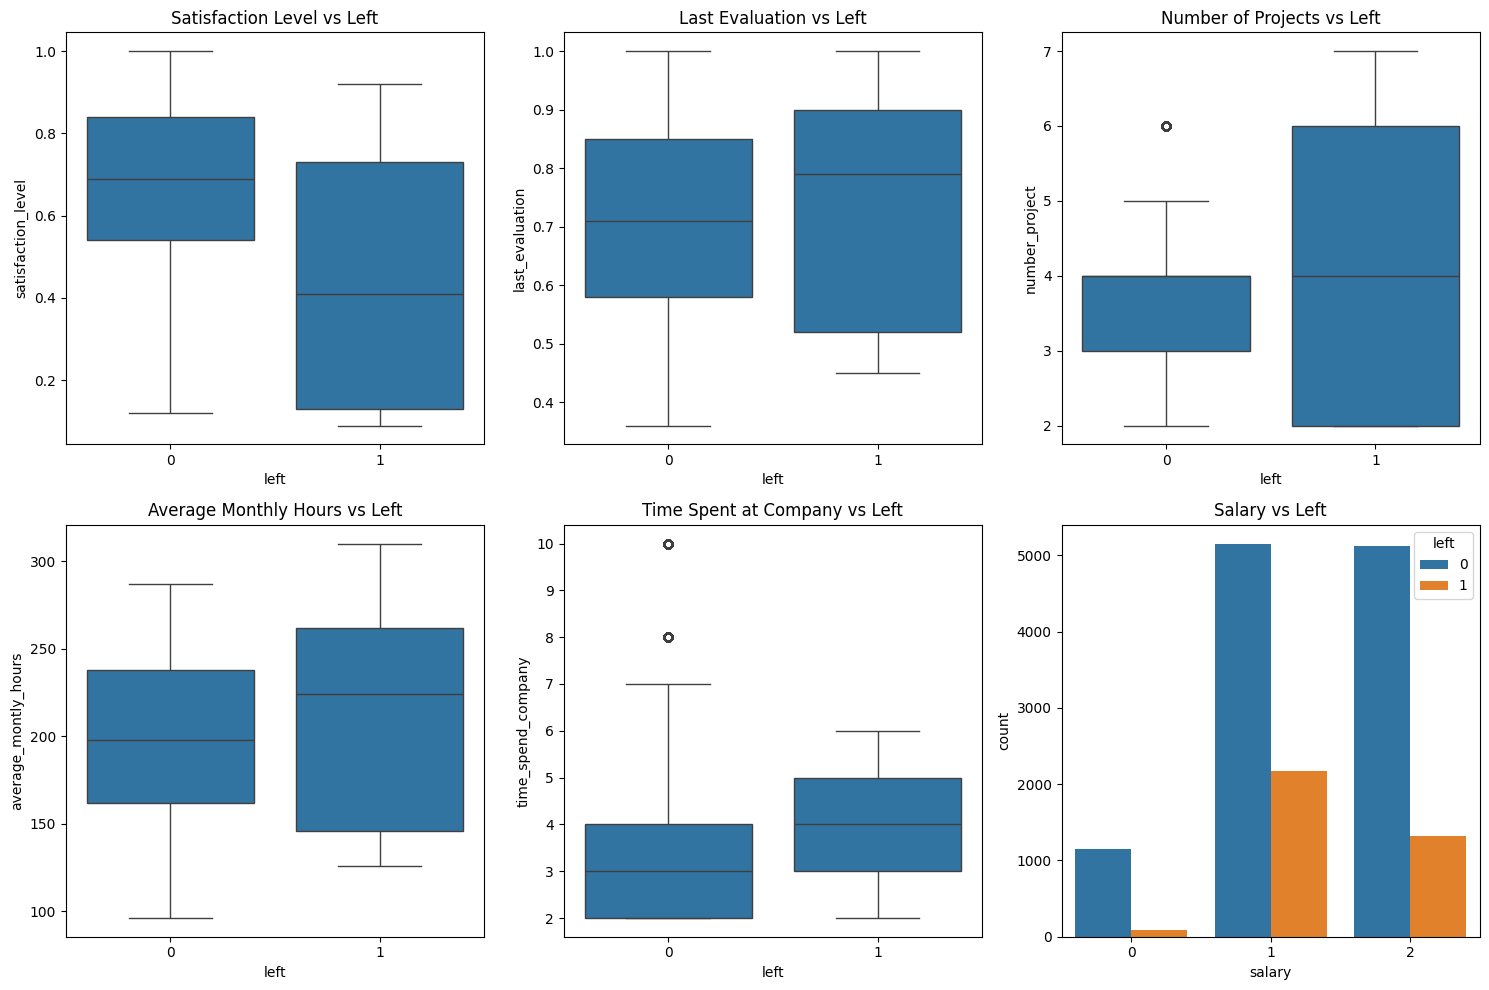

In [9]:
# Visualize relationships with the target variable 'left'
plt.figure(figsize=(15, 10))

# Satisfaction level vs Left
plt.subplot(2, 3, 1)
sns.boxplot(x='left', y='satisfaction_level', data=data)
plt.title('Satisfaction Level vs Left')

# Last evaluation vs Left
plt.subplot(2, 3, 2)
sns.boxplot(x='left', y='last_evaluation', data=data)
plt.title('Last Evaluation vs Left')

# Number of projects vs Left
plt.subplot(2, 3, 3)
sns.boxplot(x='left', y='number_project', data=data)
plt.title('Number of Projects vs Left')

# Average monthly hours vs Left
plt.subplot(2, 3, 4)
sns.boxplot(x='left', y='average_montly_hours', data=data)
plt.title('Average Monthly Hours vs Left')

# Time spent at company vs Left
plt.subplot(2, 3, 5)
sns.boxplot(x='left', y='time_spend_company', data=data)
plt.title('Time Spent at Company vs Left')

# Salary vs Left
plt.subplot(2, 3, 6)
sns.countplot(x='salary', hue='left', data=data)
plt.title('Salary vs Left')

plt.tight_layout()
plt.show()

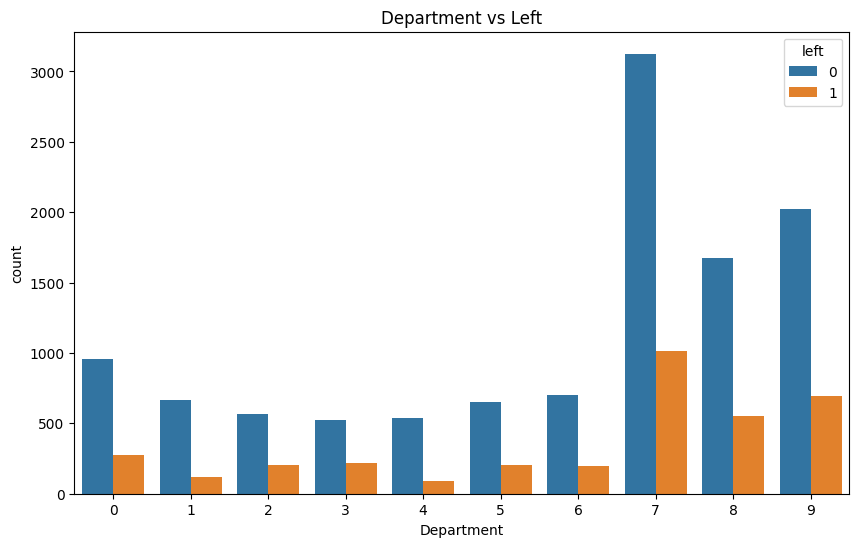

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='left', data=data)
plt.title('Department vs Left')
plt.show()

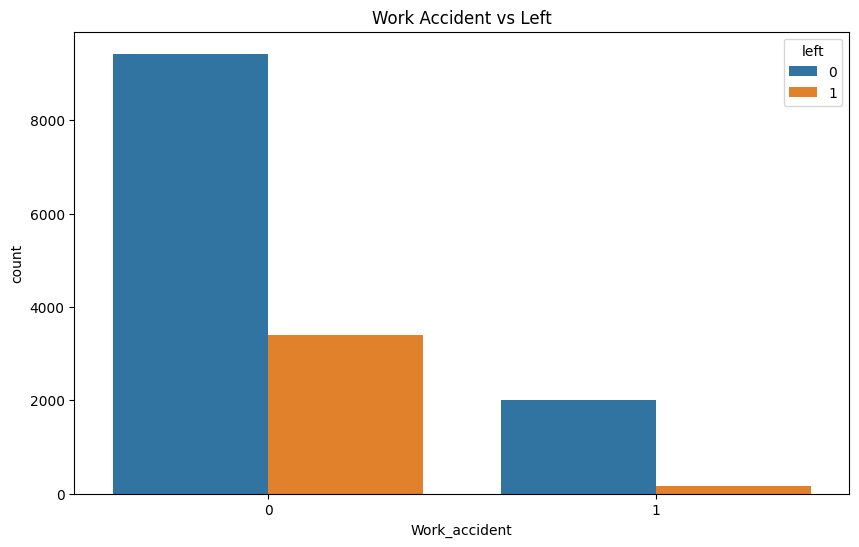

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Work_accident', hue='left', data=data)
plt.title('Work Accident vs Left')
plt.show()

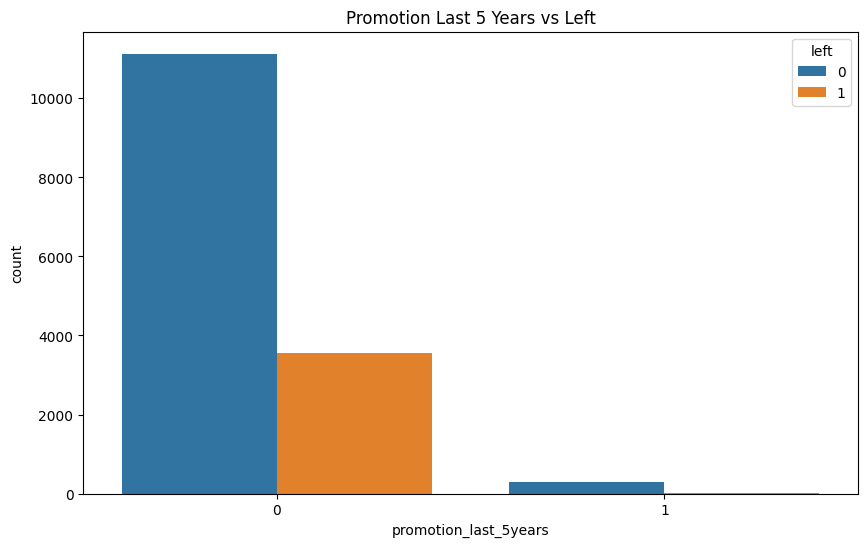

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='promotion_last_5years', hue='left', data=data)
plt.title('Promotion Last 5 Years vs Left')
plt.show()

In [13]:
subdf = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [14]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [15]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies = df_with_dummies.astype(int)

In [16]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_0,salary_1,salary_2
0,0,157,0,1,0,1,0
1,0,262,0,2,0,0,1
2,0,272,0,2,0,0,1
3,0,223,0,1,0,1,0
4,0,159,0,1,0,1,0


In [17]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_0,salary_1,salary_2
0,0,157,0,1,0,1,0
1,0,262,0,2,0,0,1
2,0,272,0,2,0,0,1
3,0,223,0,1,0,1,0
4,0,159,0,1,0,1,0


In [18]:
y = data.left

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred = model.predict(X_test)

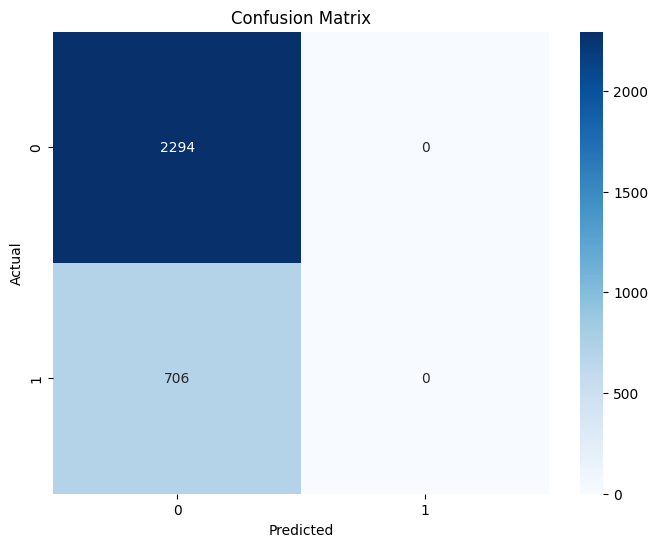

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2294    0]
 [ 706    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2294
           1       0.00      0.00      0.00       706

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000


Accuracy Score:
0.7646666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
